# Maggie's Notebook

In [1]:
# import packages

import pandas as pd
import geopandas as gpd

import plotly.express as px
import osmnx as ox

import matplotlib.pyplot as plt
import xyzservices.providers as xyz
import numpy as np

import folium

# import plotting libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import contextily as ctx


## Mapping Renewable Energy Development
Step One: Pull all data on power plants from open street map using set coordinates as geographic parameter and define that new data set as "osm_power" <br>
Step Two: Set the crs to espg=4236 <br>
Steo Three: Plot osm_power <br>
Step Four: Add basemaps <br>
Step Five: Repeat for different color combos for storymap

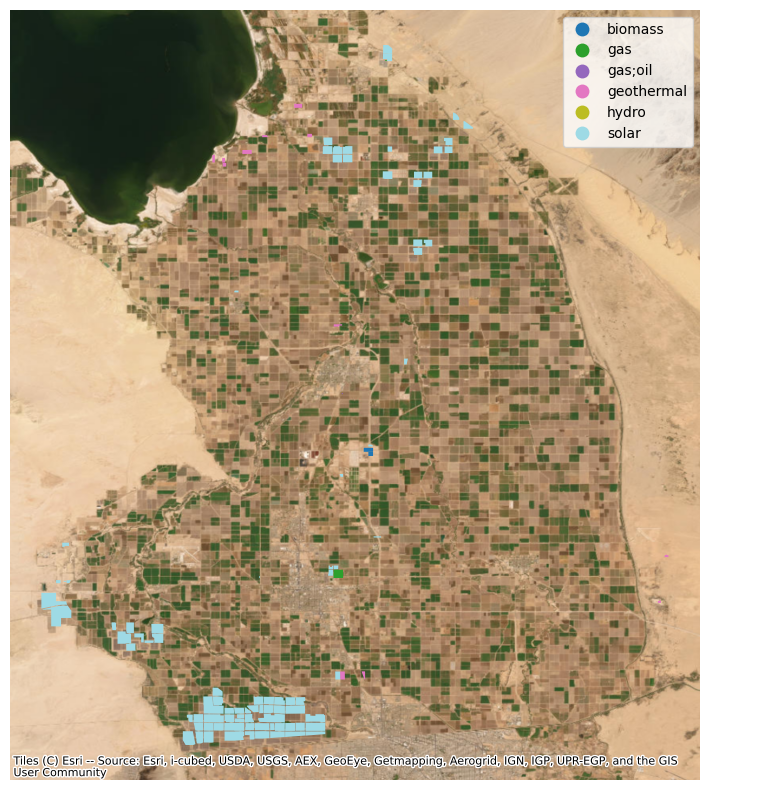

In [2]:
#Step One:
osm_power = ox.geometries_from_bbox(33.334227468796854, 32.65492287146084, -115.83365958918598, -115.25770254774852, tags={'power':'plant'})

#Step Two: 
osm_power = osm_power.to_crs(epsg=4236)
fig, ax = plt.subplots(figsize=(10,10))

#Step Three:
osm_power.plot(ax=ax,
               column='plant:source',
               cmap='tab20',
               legend=True
              )

ax.axis('off')

#Step Four: 
ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery
               )

fig.savefig("graphs/renewables-satalite.png", transparent=True)

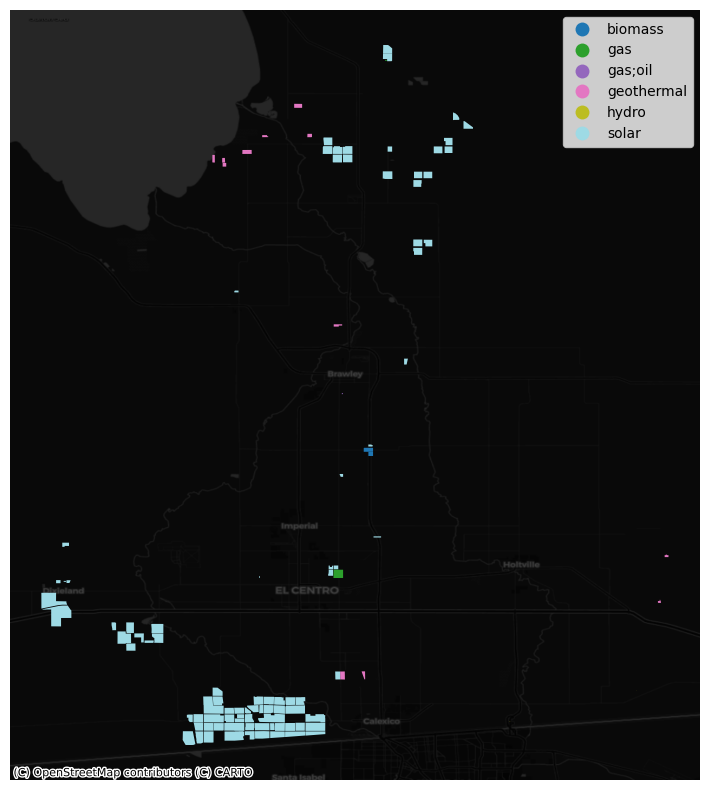

In [3]:
#Step One:
osm_power = ox.geometries_from_bbox(33.334227468796854, 32.65492287146084, -115.83365958918598, -115.25770254774852, tags={'power':'plant'})

#Step Two: 
osm_power = osm_power.to_crs(epsg=4236)
fig, ax = plt.subplots(figsize=(10,10))

#Step Three:
osm_power.plot(ax=ax,
               column='plant:source',
               cmap='tab20',
               legend=True
              )

ax.axis('off')

#Step Four: 
ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.CartoDB.DarkMatter
               )

fig.savefig("graphs/renewables-contrastdark.png", transparent=True)

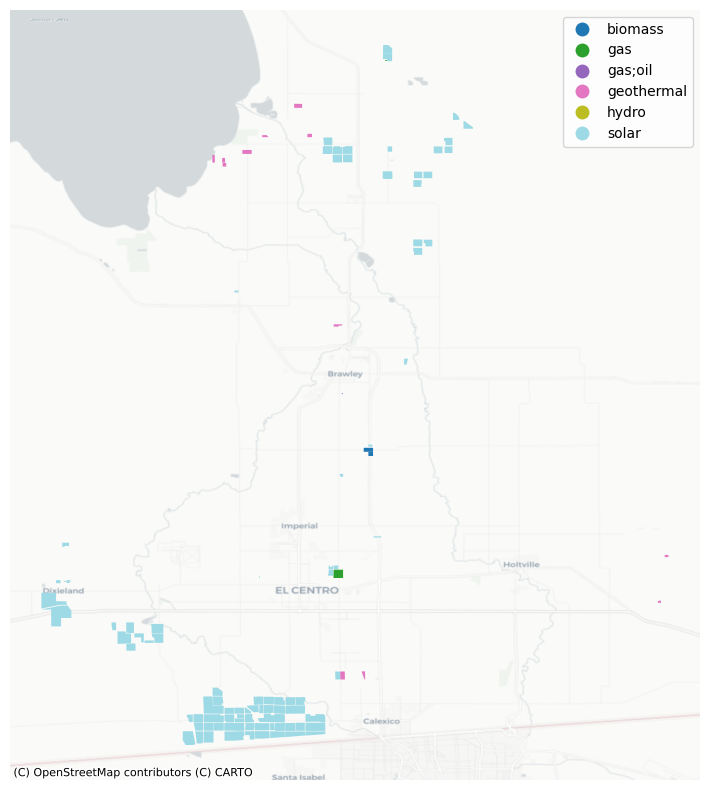

In [4]:
#Step One:
osm_power = ox.geometries_from_bbox(33.334227468796854, 32.65492287146084, -115.83365958918598, -115.25770254774852, tags={'power':'plant'})

#Step Two: 
osm_power = osm_power.to_crs(epsg=4236)
fig, ax = plt.subplots(figsize=(10,10))

#Step Three:
osm_power.plot(ax=ax,
               column='plant:source',
               cmap='tab20',
               legend=True
              )

ax.axis('off')

#Step Four: 
ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.CartoDB.Positron
               )

fig.savefig("graphs/renewables-contrastlight.png", transparent=True)

## Graphing Renewable Development 
Step Zero: I created a data set in excel by googling the names of powerplants provided in osm_power and adding the year the plant was commissioned <br>
Step One: Import the new data file as a df called osm_power_years <br>
Step Two: Merge the gdf I used for mapping above (osm_power) with the osm_years csv to add year commissioned to the osm_power gdf<br>
Step Three: Data cleaning - I didnt get a date for every power plant, so I had to replace the naans with 0s so I could convert year from float to integer. Then I removed all the 0s from osm_power<br>
Step Four: Create a count of different types of power plants by year<br>
Step Five: Create a bar chart and add some styling (titles, axes edits, etc)


In [5]:
#import the data (I created this data set simply by looking up the names of the power plants provided via openstreet maps and creating a csv manually)
osm_power_yrs=pd.read_csv("data/osm_power_years.csv")

#merge the dates I looked up with the osm data df
osm_power=osm_power.merge(osm_power_yrs,on='name')

#fill n/a with 0s
osm_power['year_commissioned'] = osm_power['year_commissioned'].fillna(0).replace([np.inf, -np.inf], 0)
osm_power['year_commissioned']=osm_power['year_commissioned'].astype(int)

#remove the zeros
osm_power = osm_power[osm_power['year_commissioned'] != 0]

#create a count of plants by year (by source)
plants_by_year =osm_power.groupby(['year_commissioned','plant:source']).size().reset_index(name='count')



/opt/conda/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



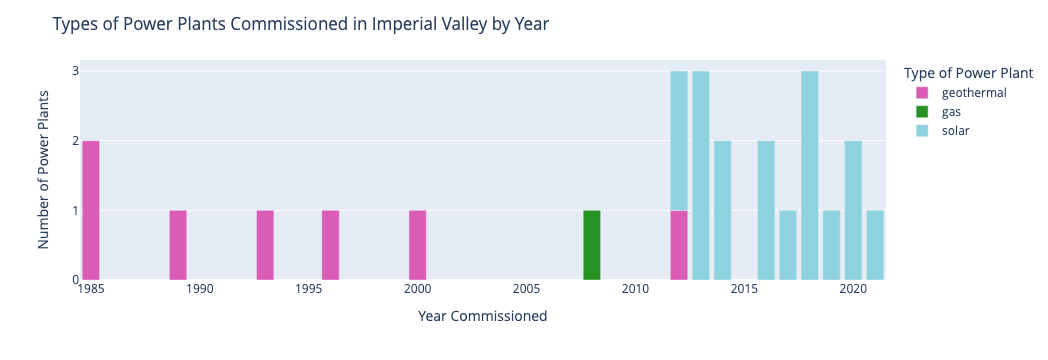

In [14]:
# make a stacked bar chart
fig = px.bar(plants_by_year,
       x='year_commissioned',
       y='count',
       color='plant:source',
             color_discrete_map={
                 'solar': '#8ED2DE',
                 'geothermal':'#DA5CB5',
                 'gas': '#279221'
             }
)
        

fig.update_layout(
    title='Types of Power Plants Commissioned in Imperial Valley by Year',
    xaxis=dict(title='Year Commissioned'),
    yaxis=dict(title='Number of Power Plants'),
    legend= dict(
        title='Type of Power Plant',
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)',
    )
)

fig.update_yaxes(tickvals=[0, 1, 2, 3])

fig.show()

fig.write_html("graphs/plants_by_year_colors.html")

## Waterways in the Imperial Valley
Step One: Pull all data on waterways from open street map using set coordinates as geographic parameter and define that new data set as "osm_water" <br>
Step Two: Set the crs to espg=4236 <br>
Steo Three: Plot osm_water <br>
Step Four: Add basemaps<br>
Step Five: Repeat for different color combos for storymap

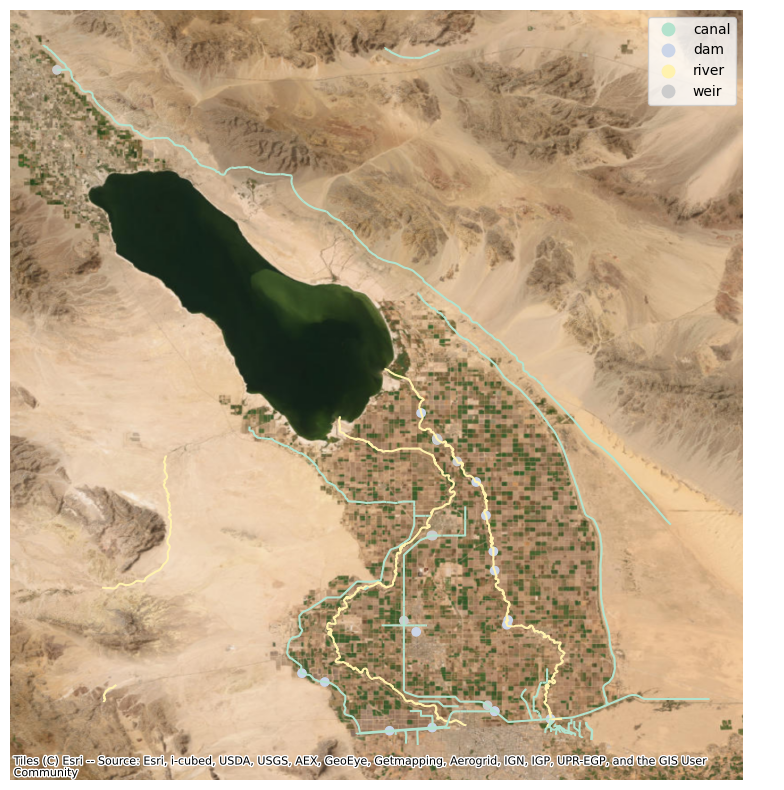

In [30]:
#Step One
osm_water = ox.geometries_from_bbox(33.701090957662295, 32.65492287146084, -116.20425754271368, -115.25770254774852, tags={'waterway':True})

                        
#Step Two: 
osm_water = osm_water.to_crs(epsg=4236)
fig, ax = plt.subplots(figsize=(10,10))

osm_water_filtered = osm_water[osm_water['waterway'].isin(['canal', 'dam', 'river', 'weir', 'drain, lock_gate'])]

#Step Three:
osm_water_filtered.plot(ax=ax,
         column='waterway',
         cmap='Pastel2',
         legend=True)
ax.axis('off')

#Step Four: 
ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.Esri.WorldImagery
                )

fig.savefig("graphs/waterways-satalite.png", transparent=True)

In [ ]:
#Step One
osm_water2 = ox.geometries_from_bbox(33.701090957662295, 32.65492287146084, -116.20425754271368, -115.25770254774852, tags={'waterway':True})

                        
#Step Two: 
osm_water2 = osm_water2.to_crs(epsg=4236)
fig, ax = plt.subplots(figsize=(10,10))

#Step Three:
osm_water2.plot(ax=ax,
         column='waterway',
         cmap='tab20',
         legend=True)
ax.axis('off')

#Step Four: 
ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.CartoDB.DarkMatter
                )

fig.savefig("graphs/waterways-contrastdark.png", transparent=True)

In [ ]:
#Step One
osm_water2 = ox.geometries_from_bbox(33.701090957662295, 32.65492287146084, -116.20425754271368, -115.25770254774852, tags={'waterway':True})

                        
#Step Two: 
osm_water2 = osm_water2.to_crs(epsg=4236)
fig, ax = plt.subplots(figsize=(10,10))

#Step Three:
osm_water2.plot(ax=ax,
         column='waterway',
         cmap='tab20',
         legend=True)
ax.axis('off')

#Step Four: 
ctx.add_basemap(ax=ax,
                crs=osm_power.crs.to_string(),
                source=xyz.CartoDB.Positron
                )

fig.savefig("graphs/waterways-contrastlight.png", transparent=True)

### The End